In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm


In [2]:
#Número de caminos a simular
N=8
#Tiempo inicial de la simulación
t_min=0
#Tiempo máximo de la simulación
t_max=10
#Número de muestras (cuantos puntos de muestreo entre t_min y t_max)
samples=100


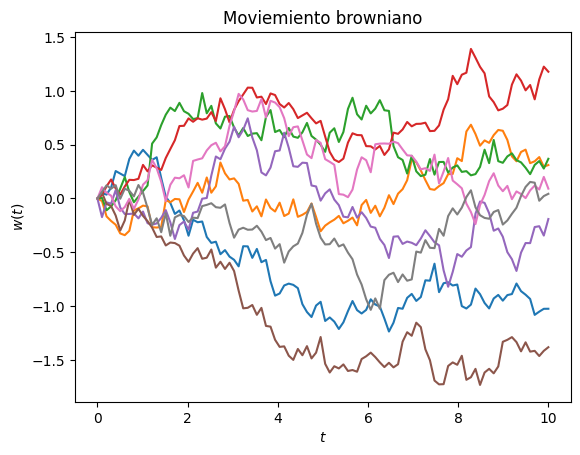

In [3]:
#Wiener solo
np.random.seed(42)
sum = np.zeros(len(np.linspace(t_min,t_max,num=samples)))
for a in range(N):
    x = np.linspace(t_min,t_max,num=samples)

    y = [0]
    for i in range(1,len(x)):
        step = x[i]-x[i-1]
        d = np.random.normal(scale=step)
        yi = y[i-1] + d
        y.append(yi)
    sum+=y

    plt.plot(x,y)
    plt.title('Moviemiento browniano')
    plt.xlabel('$t$')
    plt.ylabel('$w(t)$')
plt.show()

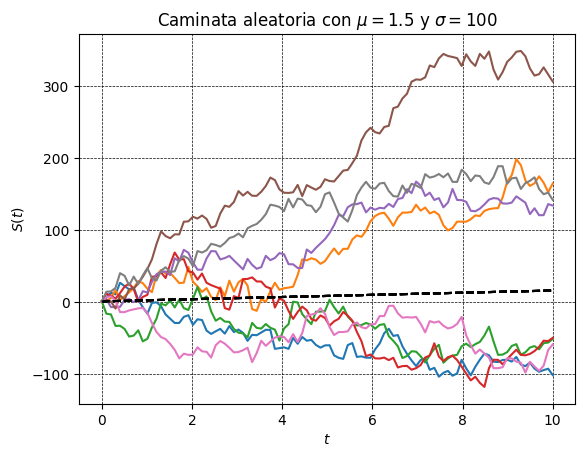

In [4]:
np.random.seed(42)
sum = np.zeros(len(np.linspace(t_min,t_max,num=samples)))
mu = 1.5
sigma = 100
sigma2=0
S0 = 1
#Activo
for a in range(N):
    x = np.linspace(t_min,t_max,num=samples)
    x_NR=np.linspace(t_min,t_max,num=samples)

    y = [S0]
    y2=[S0]
    for i in range(1,len(x)):
        step = x[i]-x[i-1]
        step2=x_NR[i]-x_NR[i-1]
        d = step*mu + sigma*np.random.normal(scale=step)
        d2=step2*mu+ sigma2*np.random.normal(scale=step)
        yi = y[i-1] + d
        y2i=y2[i-1]+d2
        y.append(yi)
        y2.append(y2i)
    sum+=y

    plt.plot(x,y)
    plt.plot(x,y2,color='black',linewidth=1.5,linestyle='--')
    plt.title(f'Caminata aleatoria con $\mu={mu}$ y $\sigma={sigma}$')
    plt.xlabel('$t$')
    plt.ylabel('$S(t)$')
    plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

In [5]:
#Activo
def pricesimu(S0,mu,sigma,t):
  
  y = [S0]
  for i in range(1,len(t)):
      step = t[i]-t[i-1]
      d = step*mu + sigma*np.random.normal(scale=step)
      if y[i-1]==0:
        yi = 0
      else:
        yi = max(y[i-1] + d,0)
      y.append(yi)
  return np.array(y)


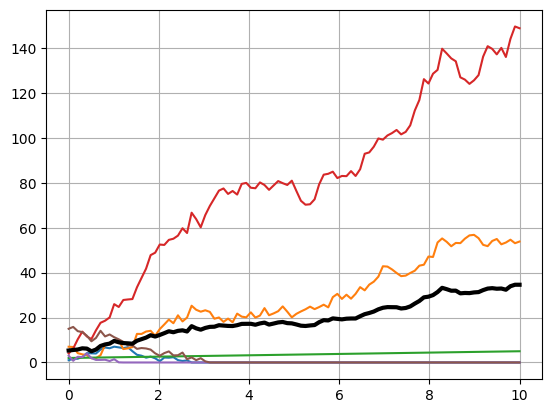

In [6]:
np.random.seed(42)
t=np.linspace(0,10,num=100)
act1=pricesimu(1,1.5,10,t)
act2=pricesimu(7,4,22,t)
act3=pricesimu(2,0.3,0,t)
act4=pricesimu(4,10,38,t)
act5=pricesimu(3,0.04,13,t)
act6=pricesimu(15,-1,17,t)
portf=(1/6)*act1+(1/6)*act2+(1/6)*act3+(1/6)*act4+(1/6)*act5+(1/6)*act6
plt.plot(x,act1)
plt.plot(x,act2)
plt.plot(x,act3)
plt.plot(x,act4)
plt.plot(x,act5)
plt.plot(x,act6)
plt.plot(x,portf,linewidth=3,color='black')
plt.grid()
plt.show()

In [7]:
def option_price(S:float,t:float,r,T,E,E2,sig):
  #simplemente es la formula C(S,t) mas parametros
  
  if T==t:
    C = max(S-E,0)
  elif T<t:
    C = 0
  elif S==0:
    C = 0
  else:
    t2 = T-t
    sig2 = sig*sig/2
    logEs = np.log(E/S)
    logE2s = np.log(E2/S)
    a = norm.cdf((logE2s-((sig2+r)*t2))/(sig*np.sqrt(t2))) - norm.cdf((logEs-((sig2+r)*t2))/(sig*np.sqrt(t2)))
    b = norm.cdf((logE2s+((sig2-r)*t2))/(sig*np.sqrt(t2))) - norm.cdf((logEs+((sig2-r)*t2))/(sig*np.sqrt(t2)))
    C = S*a-E*np.exp(-r*t2)*b 
  
  return C
  
def option_simu(S,t,r,T,E,E2,sig):
  #retorna la realizacion del proceso C a partir de una realizacion del proceso S
  C = []
  for i in range(0,len(S)):
    ti = t[i]
    Si = S[i]
    C.append(option_price(Si,ti,r,T,E,E2,sig))
  return np.array(C)





In [8]:
#cdt
def risk_free(I0,r,t):
  y = I0*np.exp(r*t)
  
  return np.array(y)

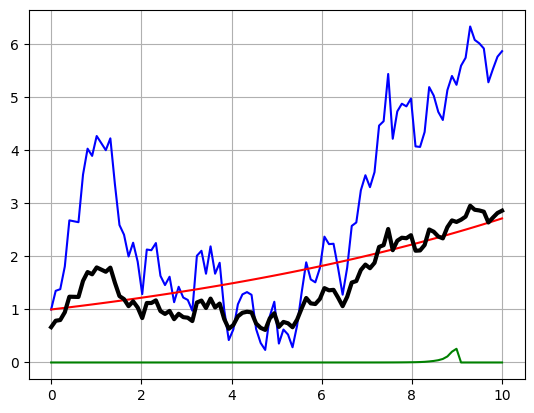

In [9]:
np.random.seed(42)

##parametros de la opcion
r = 0.1
T = 9
E = 1
E2 = 3
##parametros del activo
sigma = 5
mu = 1


t=np.linspace(t_min,t_max,num=samples)
act1=pricesimu(1,mu,sigma,t)
act2=risk_free(1,r,t)
act3=option_simu(act1,t,r,T,E,E2,sigma) 
portf=(act1+act2+act3)/3
plt.plot(t,act1,color='blue')
plt.plot(t,act2,color='red')
plt.plot(t,act3,color='green')

plt.plot(t,portf,linewidth=3,color='black')
plt.grid()
plt.show()

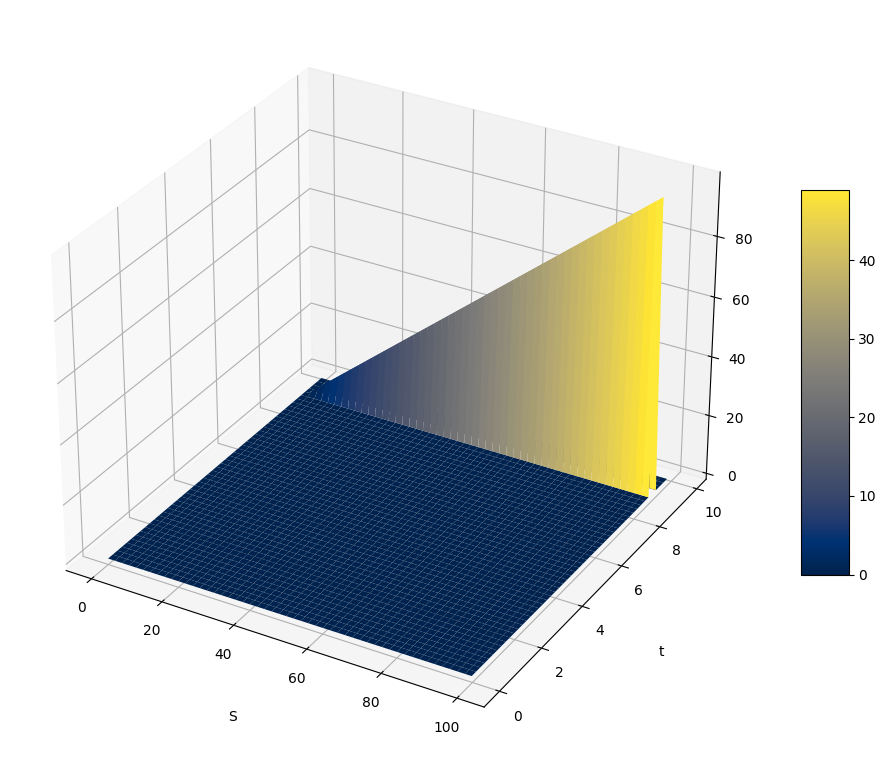

In [10]:

from mpl_toolkits import mplot3d
#from mpl_toolkits.mplot3d import axes3d



fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

S_infty = 100
step = 0.2

S = np.arange(0, S_infty, step)
t = np.arange(t_min,t_max, step)

S, t = np.meshgrid(S, t)

option_price = np.vectorize(option_price, otypes=[float])

C = option_price(S,t,r,T,E,E2,sigma)

surf = ax.plot_surface(S, t, C, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('S', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('C', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [11]:
#Parametros cheveres:

##parametros de la opcion
r = 0.15
T = t_max
E = 1
E2 = 20
##parametros del activo
sigma = 5
mu = 1



##parametros de la opcion
r = 0.1
T = t_max
E = 4
E2 = 20
##parametros del activo
sigma = 5
mu = 1


##parametros de la opcion
r = 0.15
T = 5
E = 1
E2 = 20
##parametros del activo
sigma = 5
mu = 1


##parametros de la opcion
r = 0.1
T = 9
E = 1
E2 = 20
##parametros del activo
sigma = 5
mu = 1